In [1]:
import matplotlib.pyplot as plt
import numpy as np

from utilities import get_tex_label, get_color, latex_text_width_1col
from hazma.gamma_ray_parameters import energy_res_comptel
from hazma.scalar_mediator import ScalarMediator, HiggsPortal, HeavyQuark
from hazma.vector_mediator import VectorMediator, KineticMixing, QuarksOnly

In [2]:
mxs = np.geomspace(0.1, 250, 300)  # DM masses
m_meds = np.array([50, 175, 500])  # mediator masses
x_kd = 1e-6  # 1e-4 gives weaker CMB limits for the scalar models

# Models
models = np.array(
    [
        [
            KineticMixing(1.0, 1e3, gvxx=1.0, eps=0.1),
            QuarksOnly(1.0, 1e3, gvxx=1.0, gvuu=1.0, gvdd=-1.0, gvss=0.0),
            QuarksOnly(1.0, 1e3, gvxx=1.0, gvuu=1.0, gvdd=1.0, gvss=0.0),
        ],
        [
            HiggsPortal(1.0, 1e3, gsxx=1.0, stheta=1e-1),
            HeavyQuark(1.0, 1e3, gsxx=1.0, gsQ=1e-1, mQ=1e3, QQ=1.0),
            None,
        ],
    ]
)

# Subplot titles indicating model parameters
titles = np.array(
    [
        [
            r"$\epsilon = 0.1$",
            r"$(g_{Vuu}, g_{Vdd}) = (1, -1)$",
            r"$(g_{Vuu}, g_{Vdd}) = (1, 1)$",
        ],
        [
            r"$\sin\theta = 0.1$",
            r"$(g_{S\Psi}, Q_\Psi) = (0.1, 1)$" + "\n" + r"$m_\Psi = 1$ GeV",
            "",
        ],
    ]
)

n_subplot_rows, n_subplot_cols = models.shape

/Users/acoogan/Dropbox/Physics/Sub-GeV_DM/Hazma/hazma/decay.py:54: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return decay_muon.SpectrumPoint(photon_energies, muon_energy)
/Users/acoogan/Dropbox/Physics/Sub-GeV_DM/Hazma/hazma/decay.py:141: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return decay_charged_pion.Spectrum(photon_energies, pion_energy, mode)
/Users/acoogan/Dropbox/Physics/Sub-GeV_DM/Hazma/hazma/decay.py:53: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return decay_muon.Spectrum(photon_energies, muon_energy)
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


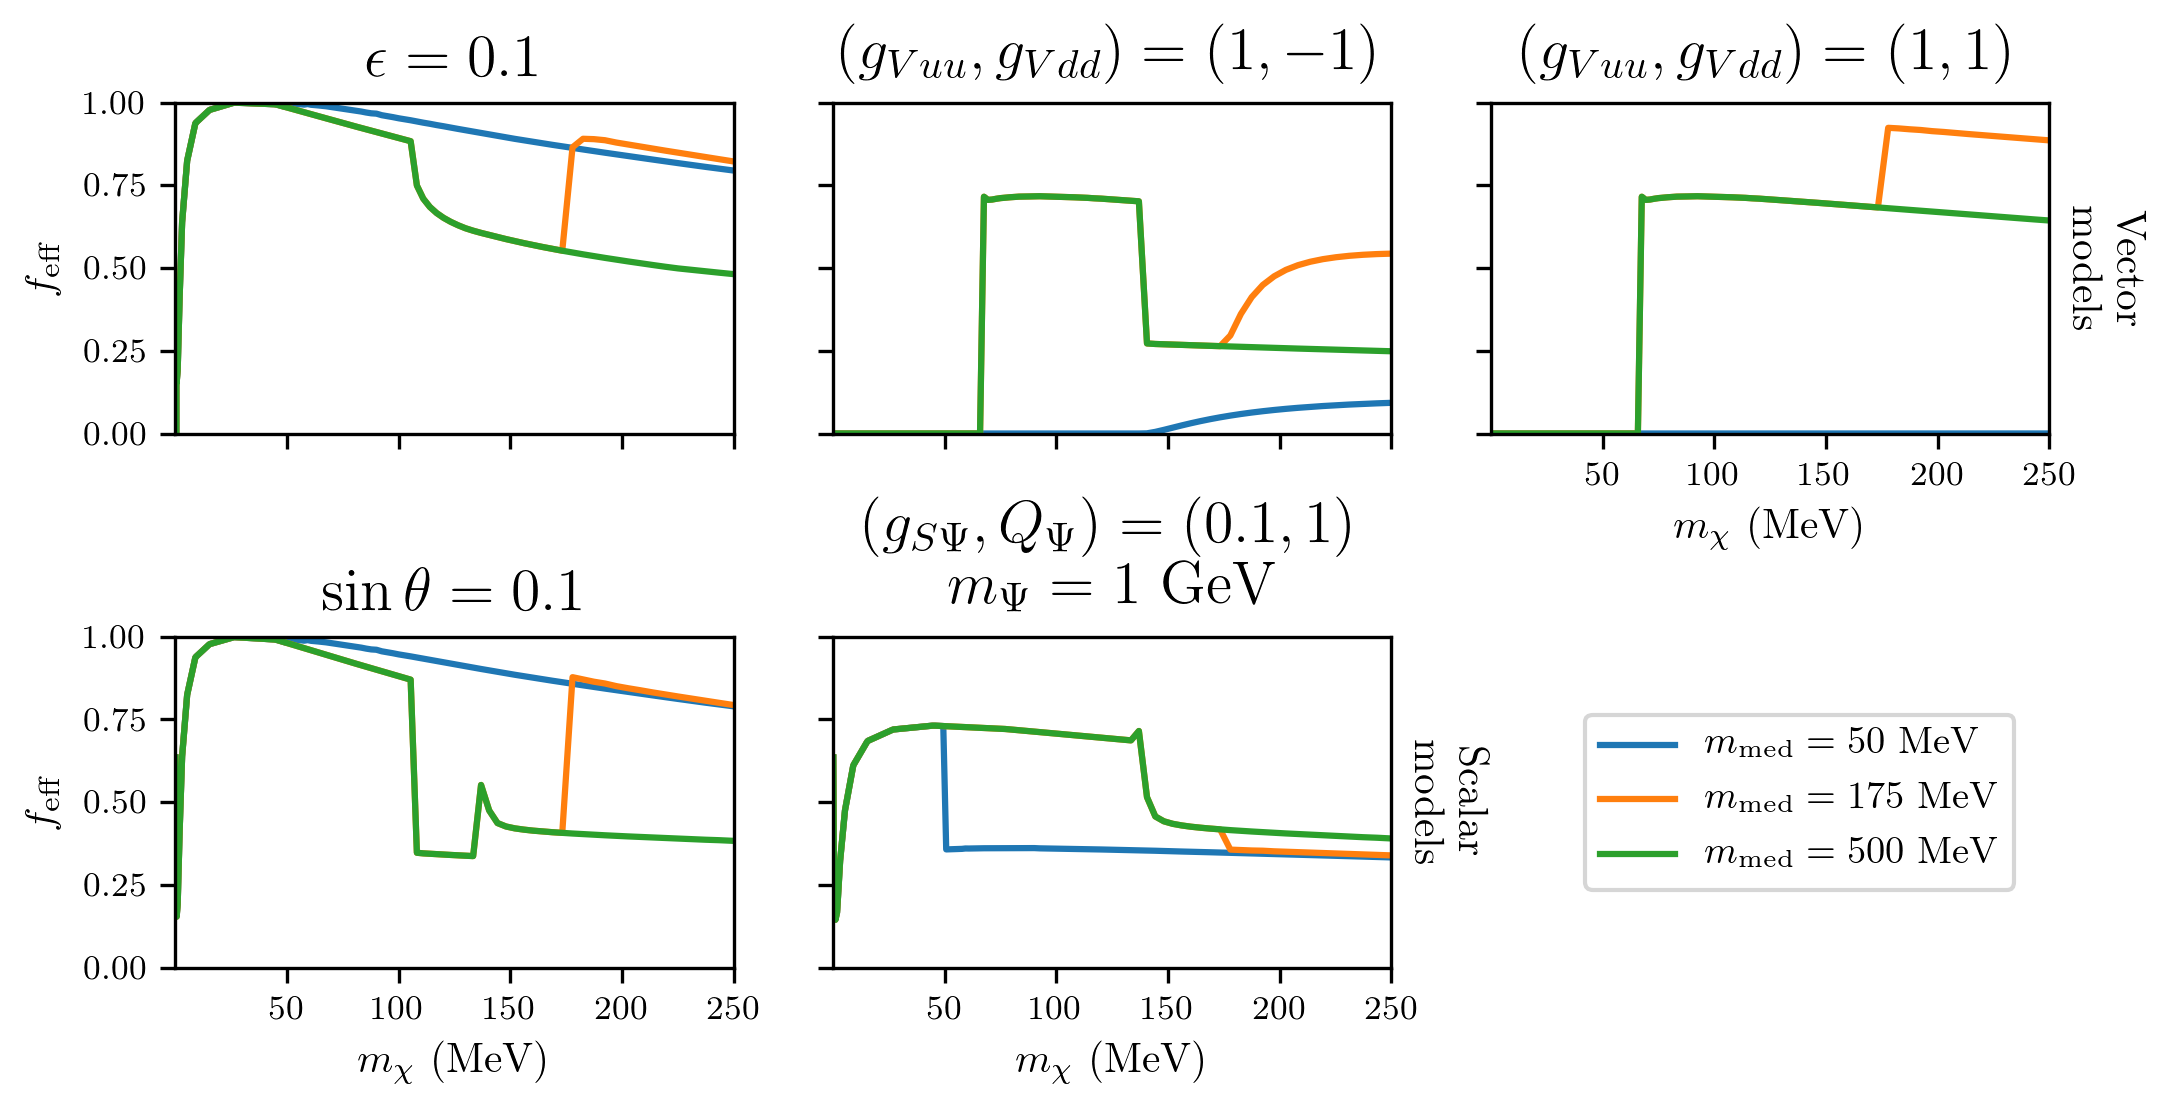

In [3]:
fig, axes = plt.subplots(
    n_subplot_rows,
    n_subplot_cols,
    sharex=True,
    sharey=True,
    figsize=(latex_text_width_1col, 0.55 * latex_text_width_1col),
)

# Delete last subplot: it will be replaced by the legend
fig.delaxes(axes[-1, -1])

for row in range(n_subplot_rows):  # loop over type of model
    for col in range(n_subplot_cols):  # loop over DM masses
        ax = axes[row, col]
        ax.set_title(titles[row, col])

        # Get the model
        model = models[row, col]
        if model is not None:
            # Iterate over mediator masses
            for m_med in m_meds:
                if isinstance(model, ScalarMediator):
                    model.ms = m_med
                    style = "-"
                    label = r"$m_{\mathrm{med}} = %i$ MeV" % model.ms
                elif isinstance(model, VectorMediator):
                    model.mv = m_med
                    style = "-"
                    label = r"$m_{\mathrm{med}} = %i$ MeV" % model.mv

                # Compute f_eff
                f_effs = np.zeros_like(mxs)
                for i, mx in enumerate(mxs):
                    model.mx = mx
                    f_effs[i] = model.f_eff(x_kd)

                # Plot f_eff
                ax.plot(mxs, f_effs, label=label, linestyle=style)

# Formatting
axes[1, 0].set_xlabel(r"$m_\chi$ (MeV)")
axes[1, 1].set_xlabel(r"$m_\chi$ (MeV)")
axes[0, 2].set_xlabel(r"$m_\chi$ (MeV)")
axes[0, 0].set_ylabel(r"$f_{\mathrm{eff}}$")
axes[1, 0].set_ylabel(r"$f_{\mathrm{eff}}$")
axes[0, 0].set_xlim(mxs[[0, -1]])
axes[0, 0].set_ylim(0, 1)
axes[0, 2].xaxis.set_tick_params(labelbottom=True)

fig.tight_layout()

# Placing the legend before tight_layout call doesn't work
axes[1, 1].legend(loc="center right", bbox_to_anchor=(2.15, 0.5))

axes[0, -1].text(
    275, 0.5, "Vector\nmodels", ha="center", va="center", fontsize=10, rotation=-90
)
axes[1, 1].text(
    275, 0.5, "Scalar\nmodels", ha="center", va="center", fontsize=10, rotation=-90
)

fig.savefig("figures/f_eff.pdf", bbox_inches="tight")
plt.show()